Step 1 : Upload Kaggle API Key


In [ ]:
# Upload the Kaggle API key (kaggle.json) from your local system.
# This file is required to authenticate and access datasets from Kaggle.

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"meharshchandure","key":"d627c4ee7abfb3017c7ff1976904f24f"}'}

Step 2: Set up Kaggle API credentials

In [ ]:
# Create a hidden `.kaggle` folder, copy the uploaded `kaggle.json` to it,and set secure permissions for safe access by the Kaggle CLI tool.

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Step 3: Install Kaggle API client

In [ ]:
# Install the official Kaggle Python API tool required to interact with Kaggle from Colab.

!pip install -q kaggle

Step 4: Download dataset from Kaggle

In [ ]:
# Use Kaggle CLI to download a public dataset using its dataset slug.

!kaggle datasets download -d spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 30.4MB/s]


Step 5: Unzip dataset

In [ ]:
# Unzip the downloaded Kaggle dataset so we can read the CSV file inside.

!unzip -o students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


Step 6: Load and display dataset


In [ ]:
# Read the CSV dataset using pandas and display the first few rows to explore the data.

import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Step 7: Encode categorical features

In [ ]:
# Encode all categorical (non-numeric) columns using Label Encoding.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


Step 8: Feature selection and train/test split

In [ ]:
# Select features (independent variables) and the target (dependent variable).

from sklearn.model_selection import train_test_split

X = df.drop("math score", axis=1)
y = df["math score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 9: Feature Scaling

In [ ]:
# Normalize (scale) the features using StandardScaler for better model performance.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 10: Train Linear Regression Model

In [ ]:
# Train a Linear Regression model using the scaled training data.

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 11: Predict and evaluate model

In [ ]:
# Use the trained model to make predictions and evaluate using metrics like
# Mean Squared Error and R² score to assess model performance.

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 28.27528450632738
R² Score: 0.8838026201112221


Step 12: Visualize Actual vs Predicted Scores

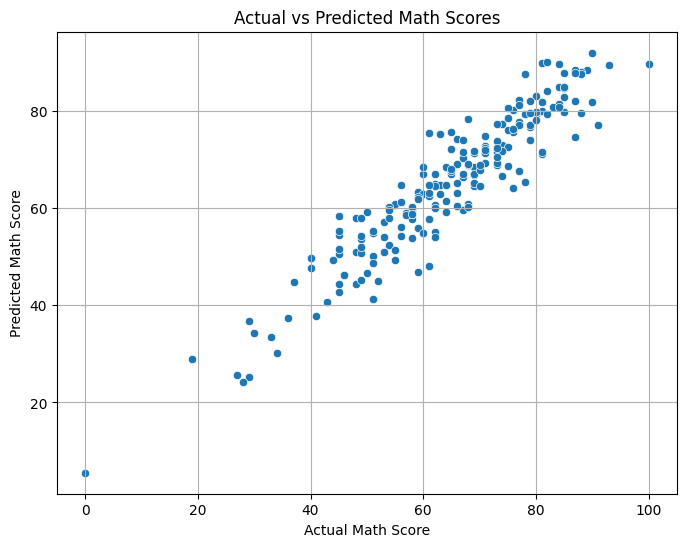

In [ ]:
# Visualize the actual vs predicted values using a scatter plot for better interpretation.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()